In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Create data

In [5]:
def plot_results(iteration):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
    all_probs = forward(evaldf[features], W)
    
    all_preds = (all_probs > 0.5).astype(np.int)
    evaldf['pred'] = all_preds

    # actual
    traindf.query('y==0').plot.scatter('f1', 'f2', ax=ax1, label='0')    
    ax1 = traindf.query('y==1').plot.scatter('f1', 'f2', ax=ax1, color='red', label='1')
    ax1.set_title('actual')
    ax1.legend()

    # predicted
    try:
        ax=evaldf.query('pred==0').plot.scatter('f1', 'f2', ax=ax2)
    except:
        print('no neg labels')

    try:
        ax=evaldf.query('pred==1').plot.scatter('f1', 'f2', ax=ax2, color='red')
    except:
        print('no pos labels')
    print(iteration)
    t = ax.text(0.9, 0.9, iteration, fontsize=12)
    t.set_bbox(dict(facecolor='white', edgecolor='grey'))

    fig.savefig('results/images/step_{}'.format(str(step).zfill(4)))
    plt.close()

/home/linux-chris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


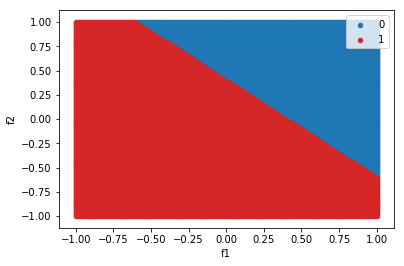

In [402]:
import seaborn as sns

n = 200
x = np.linspace(-1, 1, n)
y = x

# build indep variables
cartesian_xy = np.array([[x0, y0] for x0 in x for y0 in y])
df_data = pd.DataFrame(cartesian_xy, columns=['f1','f2'])

# space
xor = (df_data.f1 > 0).astype(np.int) ^ (df_data.f2 > 0).astype(np.int)
diag_line = ((df_data.f2 + df_data.f1 < .4)).astype(int)
vertical_stripe = ((df_data.f1 > -.2) & (df_data.f1 < 0.6)).astype(int)
horizontal_stripe = ((df_data.f2 > -.6) & (df_data.f2 < 0.6)).astype(int)
box = (vertical_stripe & horizontal_stripe).astype(int)
sinwave = ((df_data.f2 < .3+.8*np.sin(2*df_data.f1))).astype(int)
sinwave = ((df_data.f2 < -.5 + np.sin(1.5+2*df_data.f1))).astype(int)

# build dep variable
df_data['y'] = diag_line
# mix order
df = df_data.sample(frac=1.)

# plot distribution
blue = sns.color_palette()[0]
red = sns.color_palette()[3]
grid = df_data[['f1','f2','y']].as_matrix().reshape(n,n,3)
ax=df.query('y==0').plot.scatter('f1', 'f2',
                                 color=blue,
                                 label='0')
df.query('y==1').plot.scatter('f1', 'f2',
                              ax=ax,
                              color=red,
                              label='1')
plt.legend()

In [4]:
'4'.zfill(4)

'0004'

In [117]:
diag_line.name

In [403]:
!rm -r results/images
!mkdir results/images

def _sigmoid(logits):
    return 1/(1 + np.exp(-logits))

def forward(X, W):
    logits = np.dot(X, W)
    return _sigmoid(logits)[:,0]

def gradient(X, y, pred):
    return np.dot((pred - y), X).T/y.shape[0]

def get_next_batch(df, start, end):
    if end > df.shape[0]:
        df = df.sample(frac=1.)
        start = 0
        end = BATCH_SIZE
    return df.iloc[start:end,:][features], df.iloc[start:end]['y']

def cross_entropy(y_pred, y):
    return -(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))

def add_features(_df):
    df = _df.copy()
#     df['f1f2'] = df['f1'] * df['f2']
#     df['f1+f2'] = df['f1'] + df['f2']
#     df['f1_2'] = df['f1']**2
#     df['f2_2'] = df['f2']**2 
#     df['f1_3'] = df['f1']**3 
#     df['f2_3'] = df['f2']**3 
#     df['f1_div_f2'] = df['f1'] / df['f2']
    df['bias'] = 1
    return df


#
BATCH_SIZE = 100
STEPS = 20
LEARNING_RATE = 1


in_train_set = np.random.rand(len(df)) < 0.95
traindf = add_features(df)[in_train_set]
evaldf = add_features(df)[~in_train_set]
features = traindf.columns.drop('y')#.tolist()
N_FEATURES = len(features)




# initialize
start = 0
end = BATCH_SIZE
W = np.random.random([N_FEATURES, 1])
dw = 0
losses = []
for step in range(STEPS):
    
    if step % 1 ==0:
        plot_results(step)
        
    X_batch, y_batch = get_next_batch(traindf, start, end)
    pred = forward(X_batch, W)
    dw = gradient(X_batch, y_batch, pred).reshape(N_FEATURES,1) 
    W -= LEARNING_RATE*dw
    
    start += BATCH_SIZE
    end += BATCH_SIZE
    LEARNING_RATE *= .99
    losses.append(cross_entropy(pred, y_batch).mean())

0
1
no neg labels
2
no neg labels
3
no neg labels
4
no neg labels
5
no neg labels
6
7
8
9
10
11
12
13
14
15
16
17
18
19


## to GIF

In [404]:
!convert -delay 20 -loop 0 results/images/*.png results/diag.gif

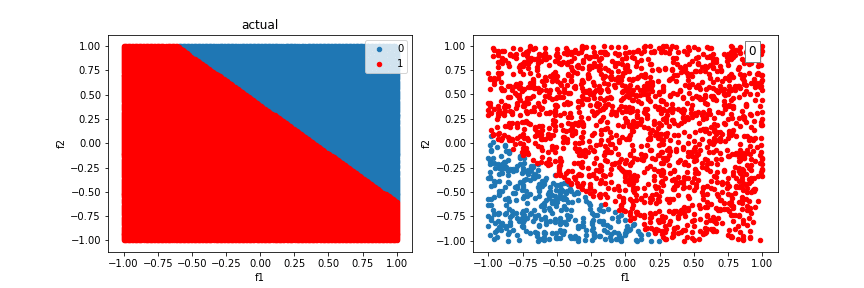

In [405]:
from IPython.display import Image
Image(filename="results/diag.gif")

## Titanic

In [410]:
titanic = sns.load_dataset('titanic')

def woman_child_or_man(passenger):
    age, sex = passenger
    if age < 16:
        return "child"
    else:
        return dict(male="man", female="woman")[sex]
    
# source: https://gist.github.com/mwaskom/8224591    
titanic["class"] = titanic.pclass.map({1: "First", 2: "Second", 3: "Third"})
# titanic["who"] = titanic[["age", "sex"]].apply(woman_child_or_man, axis=1)
# titanic["adult_male"] = titanic.who == "man"
# titanic["deck"] = titanic.cabin.str[0].map(lambda s: np.nan if s == "T" else s)
titanic["embark_town"] = titanic.embarked.map({"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"})
titanic["alive"] = titanic.survived.map({0: "no", 1: "yes"})
titanic["alone"] = ~(titanic.parch + titanic.sibsp).astype(int)
titanic["is_child"] = (titanic.age < 15).astype(int)

titanic = titanic.rename(columns={'sibsp': '# siblings aboard'})
titanic = titanic.drop(['alive', 'who'], axis=1)

df = pd.get_dummies(titanic)#.fillna(-1)
df.age = df.age.fillna(df.age.median())
df = df.drop('adult_male', axis=1)
df = df.rename(columns={'survived': 'y'})
df = df[['y', 'age', 'pclass', 'sex_male']]
msk = np.random.rand(len(df)) < 0.8
_traindf = df[msk]
_evaldf = df[~msk]

In [411]:
df

,y,age,pclass,sex_male
0,0,22.0,3,1
1,1,38.0,1,0
2,1,26.0,3,0
3,1,35.0,1,0
4,0,35.0,3,1
5,0,28.0,3,1
6,0,54.0,1,1
7,0,2.0,3,1
8,1,27.0,3,0
9,1,14.0,2,0


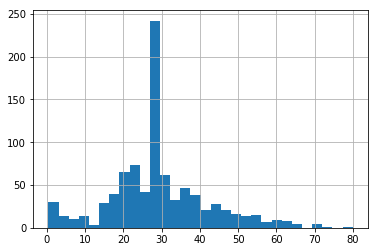

In [336]:
# df.age.value_counts().sort_index().plot()
df.age.hist(bins=30)

In [275]:
def cross_columns(df, column_one, cross_columns_starts_with):
    _df = df.copy()
    columns_to_cross_with = _df.columns[_df.columns.str.startswith(cross_columns_starts_with)]
    for column in columns_to_cross_with:
        cross_col = ('{}_x_{}'.format(column_one, column))
        _df[cross_col] = _df[column_one] * _df[column]
    return _df 

In [398]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

def add_features(_df):
    df = _df.copy()
#     df = cross_columns(df, column_one, cross_columns_starts_with)  
    df['sex_age'] = df.sex_male * df.age
#     df['bias'] = 1
    return df

def normalize(df):
    return (df-df.mean())/df.std()


BATCH_SIZE = 100
STEPS = 300
LEARNING_RATE = 0.01

def train():

    msk = np.random.rand(len(df)) < 0.8
    _traindf = df[msk]
    _evaldf = df[~msk]

    # in_train_set = np.random.rand(len(df)) < 0.95
    traindf = add_features(_traindf)
    evaldf = add_features(_evaldf)
    features = traindf.columns.drop('y')#.tolist()
    N_FEATURES = len(features)

    traindf[features] = normalize(traindf[features])
    evaldf[features] = normalize(evaldf[features])

    def get_next_batch(df, start, end):
        if end > df.shape[0]:
            df = df.sample(frac=1.)
            start = 0
            end = BATCH_SIZE
        return df.iloc[start:end,:][features], df.iloc[start:end]['y']

    LEARNING_RATE = 0.01
    # initialize
    start = 0
    end = BATCH_SIZE
    W = np.random.random([N_FEATURES, 1])*0.001
    dw = 0
    losses = []
    for step in range(STEPS):
        X_batch, y_batch = get_next_batch(traindf, start, end)
        pred = forward(X_batch, W)
        dw = gradient(X_batch, y_batch, pred).reshape(N_FEATURES,1) 
        W -= LEARNING_RATE*dw

        start += BATCH_SIZE
        end += BATCH_SIZE
        LEARNING_RATE *= .99
        losses.append(cross_entropy(pred, y_batch).mean())
    return roc_curve(y_batch, pred)

results = []
for i in range(100):
    results.append(train())

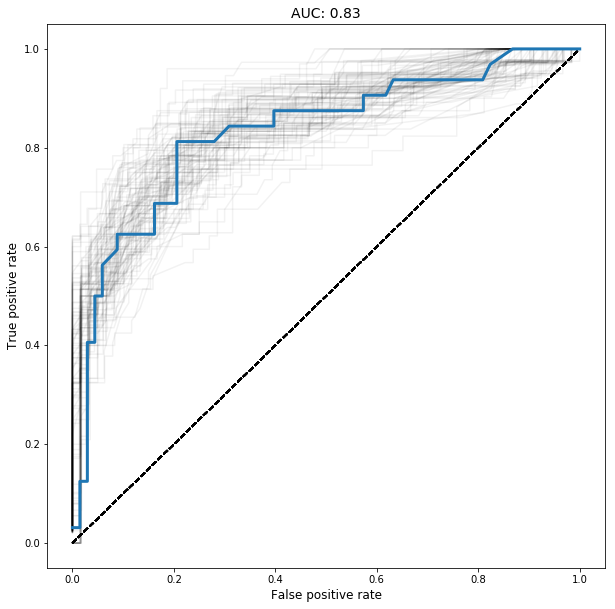

In [394]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

def plot_roc(ax, fpr, tpr, **kwargs):
    ax.plot([0, 1], [0, 1], 'k--')
    ax.plot(fpr, tpr, **kwargs)
    ax.set_xlabel('False positive rate', size=12)
    ax.set_ylabel('True positive rate', size=12)
    ax.set_title('ROC curve')

fig, ax = plt.subplots(1,1,figsize=(10,10))
fprs = []
tprs = []
for r in results:
    fpr, tpr, _ = r
    plot_roc(ax, fpr, tpr, color='black', alpha=0.05)   
    fprs.extend(fpr.tolist())
    tprs.append(tpr.tolist())
plot_roc(ax, fpr, tpr, alpha=1, color=sns.color_palette()[0], linewidth=3)
plt.title('AUC: {:2.2f}'.format(auc(fpr, tpr)), size=14)
plt.savefig('results/titanic_auc', dpi=200)

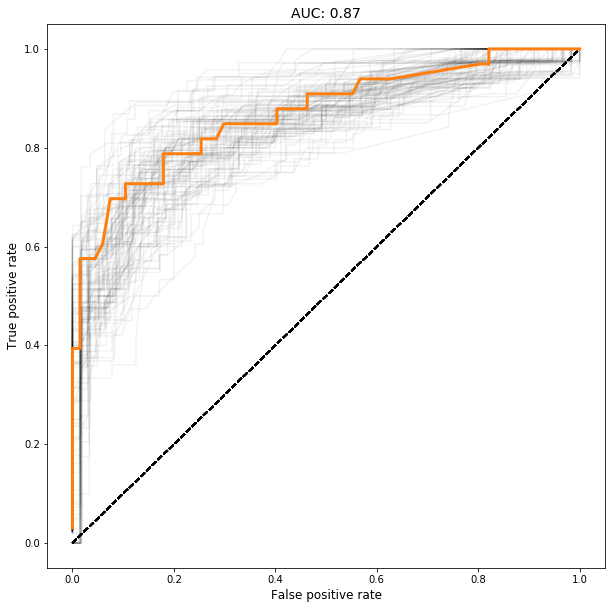

In [400]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

def plot_roc(ax, fpr, tpr, **kwargs):
    ax.plot([0, 1], [0, 1], 'k--')
    ax.plot(fpr, tpr, **kwargs)
    ax.set_xlabel('False positive rate', size=12)
    ax.set_ylabel('True positive rate', size=12)
    ax.set_title('ROC curve')

fig, ax = plt.subplots(1,1,figsize=(10,10))
fprs = []
tprs = []
for r in results:
    fpr, tpr, _ = r
    plot_roc(ax, fpr, tpr, color='black', alpha=0.05)   
    fprs.extend(fpr.tolist())
    tprs.append(tpr.tolist())
plot_roc(ax, fpr, tpr, alpha=1, color=sns.color_palette()[1], linewidth=3)
plt.title('AUC: {:2.2f}'.format(auc(fpr, tpr)), size=14)
plt.savefig('results/titanic_crossed_auc', dpi=200)